Import Packages:

I first start by loading all the packages that will be required.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

Importing Dataset:

Then the csv file is loaded in the "deaths" object.

In [6]:
deaths = pd.read_csv("C:/Users/gosli/Documents/DSE 6000/Deaths_from_Pneumonia_and_Influenza__P_I__and_all_deaths__by_state_and_region__National_Center_For_Health_Statistics_Mortality_Surveillance_System.csv")

Visualizing Dataset:

I start by displaying the first 5 rows of the dataset to get a little understanding about it. The first thing I noticed was that there were some "NaN" values within this dataset. I can also see that this data set in document deaths from influenza and pneumonia within certain regions and time periods.

In [7]:
deaths.head(5)

,geoid,Region,State,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
0,National,NaN,NaN,All,2009-10,200940,149.0,3484.0,3633.0,46412.0,7.827717,97.546212
1,National,NaN,NaN,All,2009-10,200941,174.0,3703.0,3877.0,46453.0,8.346070,97.632384
2,National,NaN,NaN,All,2009-10,200942,239.0,3841.0,4080.0,47451.0,8.598344,99.729926
3,National,NaN,NaN,All,2009-10,200943,295.0,3762.0,4057.0,46432.0,8.737509,97.588247
4,National,NaN,NaN,All,2009-10,200944,298.0,3858.0,4156.0,47372.0,8.773115,99.563888


To gather some more information about the dataset, I use the describe function. I can see by the differences in counts that most of the columns will contain "NaN".

In [9]:
deaths.describe()

,Region,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
count,4841.000000,31946.000000,6777.000000,6777.000000,31902.000000,31902.000000,31902.000000,31946.000000
mean,5.499277,201415.619076,21.914121,762.404161,222.145853,3062.913297,7.190271,106.322803
std,2.872722,267.765935,84.199791,1066.816932,592.093395,7726.290426,2.111171,11.025562
min,1.000000,200940.000000,0.000000,2.000000,0.000000,31.000000,0.000000,0.902239
25%,3.000000,201205.000000,0.000000,158.000000,27.000000,397.000000,5.849806,99.311707
50%,5.000000,201421.500000,2.000000,380.000000,66.000000,943.000000,7.000000,105.342583
75%,8.000000,201637.750000,11.000000,656.000000,147.000000,2054.000000,8.368201,112.373050
max,10.000000,201902.000000,1625.000000,6065.000000,7120.000000,67465.000000,21.505376,169.253236


In [8]:
print('The data set includes cases from ' + str(deaths.season.min()) + ' to ' + str(deaths.season.max()))

The data set includes cases from 2009-10 to 2018-19


This tell me the time range of the dataset and can be used later on in the analysis.

Data Cleaning:

When cleaning the data, I began by fixing the column names to lower case and getting rid of the spaces. I then dropped unnecessary columns and ones that had a majority of "NaN". I also renamed some columns to correct the spelling.

In [10]:
deaths.columns = deaths.columns.str.replace(' ', '_')

In [13]:
deaths.columns = deaths.columns.str.lower()

In [11]:
deaths.drop(['pecent_complete'], axis = 1, inplace = True)

In [12]:
deaths.drop(['Region'], axis = 1, inplace = True)

In [14]:
deaths.rename(columns = {'pecent_of_deaths_due_to_pneumonia_or_influenza':'percent_of_deaths_due_to_pneumonia_or_influenza'}, inplace = True)

In [15]:
deaths.rename(columns = {'pecent_complete':'percent_complete'}, inplace = True)

After he column names were fixed and unnecessary ones were dropped, I separated the data into a new data set where is was just National for the column "geoid". I did this because when "geoid" was equal to "state", the dataset had the deaths of influenza and pneumonia "NaN".

In [16]:
deaths_national = deaths[deaths.geoid == 'National']

As you can see below, now the majority of the columns are populated completely.

In [17]:
deaths_national.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1936
Data columns (total 10 columns):
geoid                                              1936 non-null object
state                                              0 non-null object
age                                                1936 non-null object
season                                             1936 non-null object
mmwr_year/week                                     1936 non-null int64
deaths_from_influenza                              1936 non-null float64
deaths_from_pneumonia                              1936 non-null float64
deaths_from_pneumonia_and_influenza                1936 non-null float64
all_deaths                                         1936 non-null float64
percent_of_deaths_due_to_pneumonia_or_influenza    1936 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 166.4+ KB


In [33]:
deaths_national.head()

,geoid,age,season,mmwr_year/week,deaths_from_influenza,deaths_from_pneumonia,deaths_from_pneumonia_and_influenza,all_deaths,percent_of_deaths_due_to_pneumonia_or_influenza
0,National,All,2009-10,200940,149.0,3484.0,3633.0,46412.0,7.827717
1,National,All,2009-10,200941,174.0,3703.0,3877.0,46453.0,8.346070
2,National,All,2009-10,200942,239.0,3841.0,4080.0,47451.0,8.598344
3,National,All,2009-10,200943,295.0,3762.0,4057.0,46432.0,8.737509
4,National,All,2009-10,200944,298.0,3858.0,4156.0,47372.0,8.773115


Graphs and Analysis:

In [36]:
print("Mean influenza deaths =" + str(deaths_national.deaths_from_influenza.mean()))

Mean influenza deaths =51.14049586776859


In [37]:
print("Median influenza deaths =" + str(deaths_national.deaths_from_influenza.median()))

Median influenza deaths =6.0


In [39]:
print("Mean pneumonia deaths =" + str(deaths_national.deaths_from_pneumonia.mean()))

Mean pneumonia deaths =1779.1095041322315


In [41]:
print("Median pneumonia deaths =" + str(deaths_national.deaths_from_pneumonia.median()))

Median pneumonia deaths =1431.0


C:\Users\gosli\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Deaths of Influenza per Season')

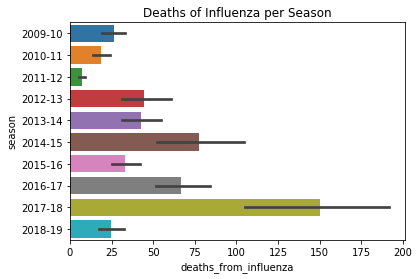

In [42]:
sns.barplot(x = 'deaths_from_influenza', y = 'season', data = deaths_national).set_title('Deaths of Influenza per Season')

As you can see from the graph above, the deaths from influenza were the highest in 2017-18 and the lowest in 2011-12. I would be interested in understanding the reasons for this.

Text(0.5, 1.0, 'Deaths of Pneumonia per Season')

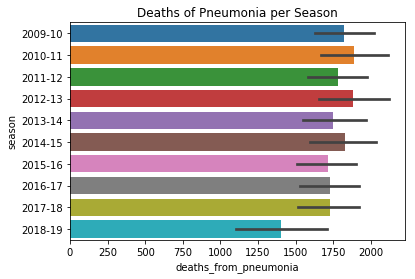

In [43]:
sns.barplot(x = 'deaths_from_pneumonia', y = 'season', data = deaths_national).set_title('Deaths of Pneumonia per Season')

In the graph above, there is not much fluncuation in the deaths from pneumonia over the years, except in 2018-19 where this is lower. This could be because the season isnt over yet.

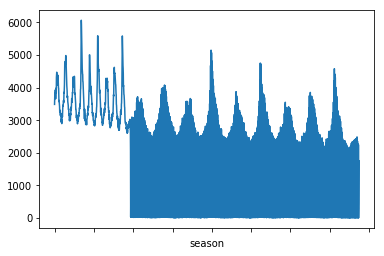

In [51]:
ts = pd.Series(deaths_national['deaths_from_pneumonia'].values, index=deaths_national['season'])
ts.plot()


The time series above, shows the deaths from pneumonia over the years. It looks to me, that this pattern is quite seasonal.

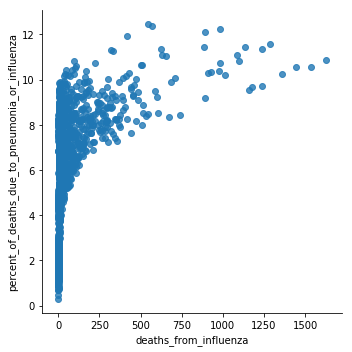

In [47]:
sns.lmplot(x='deaths_from_influenza', y='percent_of_deaths_due_to_pneumonia_or_influenza', data=deaths_national,
        fit_reg=False)

In the scatterplot above, you can see that there is some relationship between inluenza and pneumonia. As deaths from pneumonia increases, so does the deaths from influenza.

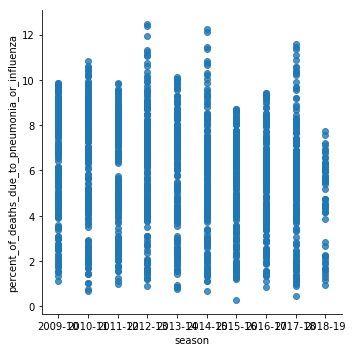

In [53]:
sns.lmplot(x='season', y='percent_of_deaths_due_to_pneumonia_or_influenza', data=deaths_national,
        fit_reg=False)


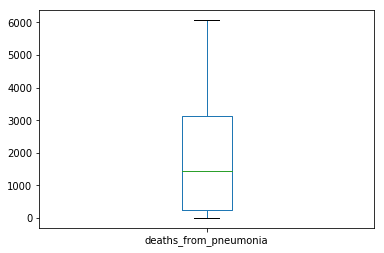

In [25]:
deaths_national['deaths_from_pneumonia'].plot.box()

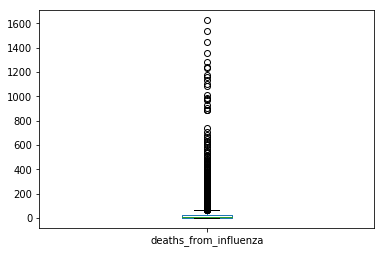

In [48]:
deaths_national['deaths_from_influenza'].plot.box()

The box plot for influenza shows how many outliers there are. This was also shown earlier in the analysis with the median deaths being 6 and the mean deaths being 51.

Conclusion:

As we saw, there is a relationship between the deaths of influenza and the deaths of pneumonia across the nation. We also saw the seasonal spikes in deaths from the time series. If I kept exploring the data, I would want to look into both of these findings. I would also like to discover why deaths from influenza is significantly higher in 2017-18 than 2011-2012, and would like to figure out what caused this.